      video_id  trending_date  \
0  Z9cB0TjfIkM  trending_date   
1  DmJuR6Q6ppo       17.01.12   
2  a8gzChJsvEo       17.01.12   

                                               title   channel_title  \
0                         Honest Trailers - The Room  Screen Junkies   
1         猎场 | Game Of Hunting 42【TV版】（胡歌、張嘉譯、祖峰等主演）            大劇獨播   
2  Everything Wrong With Arrival In 16 Minutes Or...      CinemaSins   

   Category_id              publish_time  \
0            1  2017-11-28T18:00:02.000Z   
1            1  2017-11-29T16:00:02.000Z   
2            1  2017-11-28T17:11:19.000Z   

                                                tags    views  likes  \
0  screen junkies|"screenjunkies"|"honest trailer...  1827786  57103   
1  電視劇|"大陸電視劇"|"猎场"|"职场"|"商战"|"爱情"|"都市"|"胡歌"|"陈龙"...   221052    178   
2  arrival|"amy adams"|"jeremy renner"|"arrival m...  1614392  36163   

   dislikes  comment_count                                  thumbnail_link  \
0       955           5467  https:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4628baa250>,
      dtype=object)

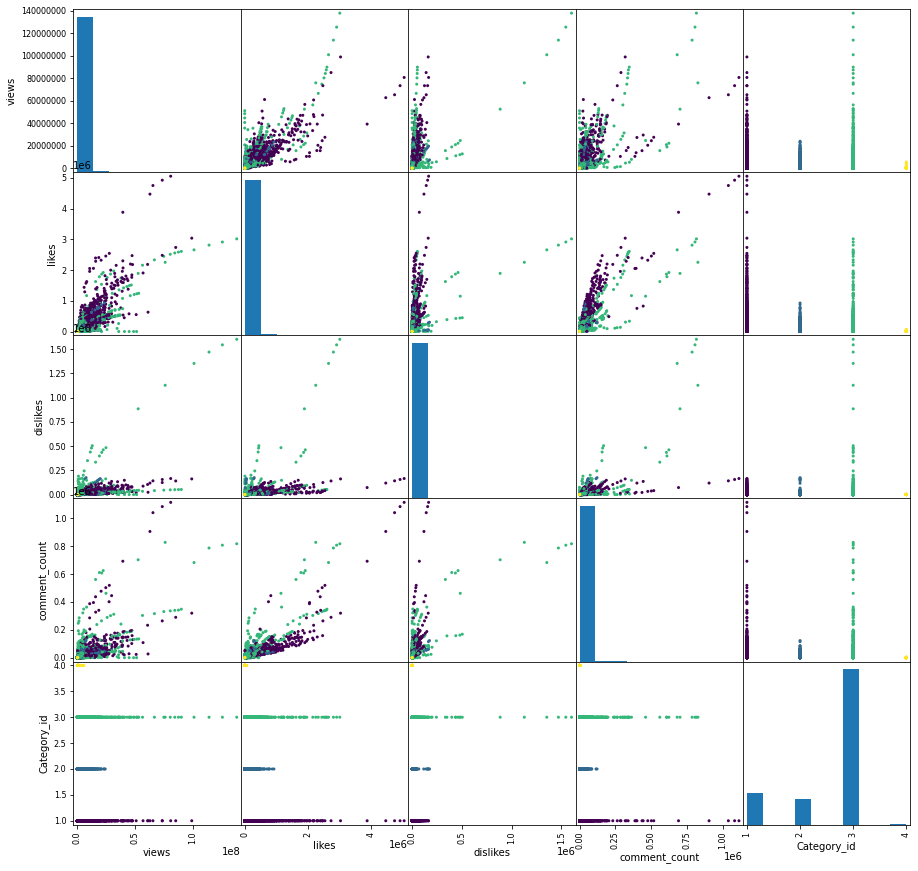

In [298]:
# Data Preprocessing Techniques 
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix

comm = pd.read_csv('CAvideos.csv')
print(comm.head(3))
print(comm.shape)

comm = comm.drop(['channel_title', 'tags', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'video_id', 'trending_date', 'title', 'publish_time'], axis = 1)
print(comm.shape)
print(comm.isnull().sum())

scatter_matrix(comm[["views", "likes", "dislikes", "comment_count", "Category_id"]], c=comm["Category_id"] , figsize=(15,15),  alpha=1)


In [299]:
# Standard Scaling used

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x = comm.drop("Category_id", axis=1)
y= comm["Category_id"]
x_train, x_test, y_train, y_test= train_test_split(x, y, stratify=y, test_size=0.05)
print("Training set: x->{} , y->{} \n Testing set: x->{} , y->{}".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Training set: x->(38835, 4) , y->(38835,) 
 Testing set: x->(2044, 4) , y->(2044,)


In [300]:
import sklearn
from sklearn import metrics
# KNeighbours Classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(x_train_scaled, y_train)

print("Training accuracy of the model is {:.2f}".format(knn.score(x_train_scaled, y_train)))
print("Testing accuracy of the model is {:.2f}".format(knn.score(x_test_scaled, y_test)))

predictions = knn.predict(x_test_scaled)
print(predictions)

from sklearn import metrics
mat=confusion_matrix(predictions, y_test)
print(mat)
print(metrics.classification_report(predictions, y_test, digits=3))


Training accuracy of the model is 0.79
Testing accuracy of the model is 0.71
[3 1 3 ... 3 3 3]
[[  97   13   95    0]
 [  11   57   91    0]
 [ 199  175 1296    5]
 [   0    0    4    1]]
              precision    recall  f1-score   support

           1      0.316     0.473     0.379       205
           2      0.233     0.358     0.282       159
           3      0.872     0.774     0.820      1675
           4      0.167     0.200     0.182         5

    accuracy                          0.710      2044
   macro avg      0.397     0.451     0.416      2044
weighted avg      0.765     0.710     0.732      2044



In [301]:
from sklearn.metrics import precision_recall_fscore_support

kn = list(precision_recall_fscore_support(predictions, y_test, average='weighted'))
kn.pop()
print(kn)

[0.7648882641640059, 0.7098825831702544, 0.7323584201960377]


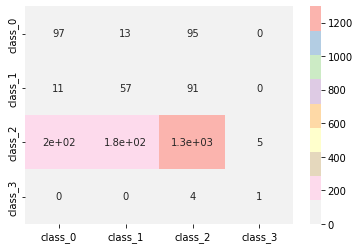

In [302]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1' ,'class_2' ,'class_3'], yticklabels=['class_0' ,'class_1', 'class_2' ,'class_3'], annot=True)

In [303]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train_scaled, y_train)
print("Training accuracy of the model is {:.2f}".format(gnb.score(x_train_scaled, y_train)))
print("Testing accuracy of the model is {:.2f}".format(gnb.score(x_test_scaled, y_test)))

predictions = gnb.predict(x_test_scaled)
print(predictions)

from sklearn import metrics
mat=confusion_matrix(predictions, y_test)
print(mat)
print(metrics.classification_report(predictions, y_test, digits=3))

Training accuracy of the model is 0.10
Testing accuracy of the model is 0.09
[2 2 4 ... 3 2 4]
[[ 28   2  43   0]
 [100  81 413   0]
 [ 43  13  79   0]
 [136 149 951   6]]
              precision    recall  f1-score   support

           1      0.091     0.384     0.147        73
           2      0.331     0.136     0.193       594
           3      0.053     0.585     0.097       135
           4      1.000     0.005     0.010      1242

    accuracy                          0.095      2044
   macro avg      0.369     0.277     0.112      2044
weighted avg      0.710     0.095     0.074      2044



In [304]:
from sklearn.metrics import precision_recall_fscore_support

nb = list(precision_recall_fscore_support(predictions, y_test, average='weighted'))
nb.pop()
print(nb)

[0.7104787862625092, 0.0949119373776908, 0.07365578742349542]


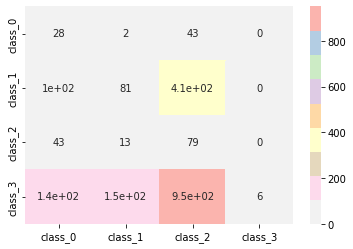

In [305]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1' ,'class_2' ,'class_3'], yticklabels=['class_0' ,'class_1', 'class_2' ,'class_3'], annot=True)

In [306]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train_scaled, y_train)

print("The Training accuracy of the model is {:.2f}".format(rfc.score(x_train_scaled, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(x_test_scaled, y_test)))

predictions = rfc.predict(x_test)
print(predictions)

from sklearn import metrics
mat=confusion_matrix(predictions, y_test)
print(mat)
print(metrics.classification_report(predictions, y_test, digits=3))

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.75
[3 3 3 ... 3 3 3]
[[   7   17   42    0]
 [   0    0    0    0]
 [ 300  228 1444    6]
 [   0    0    0    0]]
              precision    recall  f1-score   support

           1      0.023     0.106     0.038        66
           2      0.000     0.000     0.000         0
           3      0.972     0.730     0.834      1978
           4      0.000     0.000     0.000         0

    accuracy                          0.710      2044
   macro avg      0.249     0.209     0.218      2044
weighted avg      0.941     0.710     0.808      2044



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in la

In [307]:
from sklearn.metrics import precision_recall_fscore_support

rc = list(precision_recall_fscore_support(predictions, y_test, average='weighted'))
rc.pop()
print(rc)

[0.9410954494348818, 0.7098825831702544, 0.8080097358209176]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


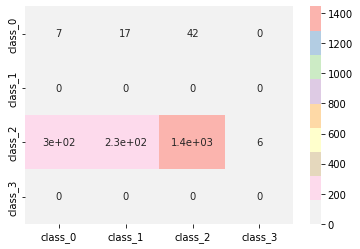

In [308]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1' ,'class_2' ,'class_3'], yticklabels=['class_0' ,'class_1', 'class_2' ,'class_3'], annot=True)

In [309]:
# Neural Network Classifier

from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)

nnc.fit(x_train_scaled, y_train)

print("The Training accuracy of the model is {:.2f}".format(nnc.score(x_train_scaled, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(nnc.score(x_test_scaled, y_test)))

predictions = nnc.predict(x_test)
print(predictions)

from sklearn.metrics import confusion_matrix
from sklearn import metrics
mat=confusion_matrix(predictions, y_test)
print(mat)
print(metrics.classification_report(predictions, y_test, digits=3))

The Training accuracy of the model is 0.74
The Testing accuracy of the model is 0.73
[3 3 3 ... 3 3 3]
[[   2    0    1    0]
 [   0    0    0    0]
 [ 305  245 1485    6]
 [   0    0    0    0]]
              precision    recall  f1-score   support

           1      0.007     0.667     0.013         3
           2      0.000     0.000     0.000         0
           3      0.999     0.728     0.842      2041
           4      0.000     0.000     0.000         0

    accuracy                          0.727      2044
   macro avg      0.251     0.349     0.214      2044
weighted avg      0.998     0.727     0.841      2044



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with

In [310]:
from sklearn.metrics import precision_recall_fscore_support

nn = list(precision_recall_fscore_support(predictions, y_test, average='weighted'))
nn.pop()
print(nn)

[0.9978698914412129, 0.7274951076320939, 0.840858433575634]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


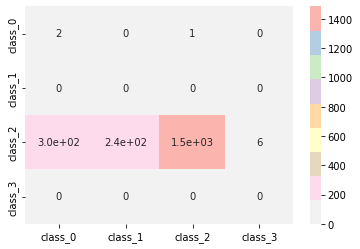

In [311]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1' ,'class_2' ,'class_3'], yticklabels=['class_0' ,'class_1', 'class_2' ,'class_3'], annot=True)

In [315]:
precision = [nb[0], kn[0], rc[0], nn[0]]
recall = [nb[1], kn[1], rc[1], nn[1]]
f1_score = [nb[2], kn[2], rc[2], nn[2]]

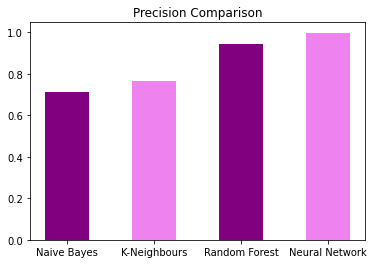

In [328]:
import matplotlib.pyplot as plt

labels = ['Naive Bayes', 'K-Neighbours', 'Random Forest', 'Neural Network']

plt.bar(range(4), precision, tick_label = labels,
		width = 0.5, color = ['purple', 'violet'])

plt.title('Precision Comparison')
plt.show()


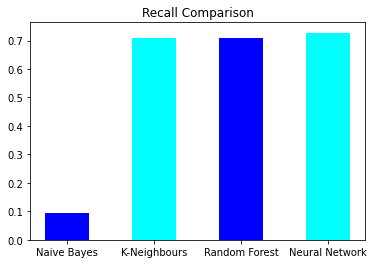

In [329]:
import matplotlib.pyplot as plt

labels = ['Naive Bayes', 'K-Neighbours', 'Random Forest', 'Neural Network']

plt.bar(range(4), recall, tick_label = labels,
		width = 0.5, color = ['blue', 'cyan'])

plt.title('Recall Comparison')
plt.show()

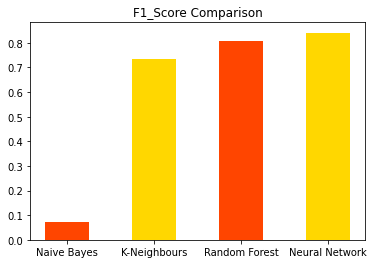

In [339]:
import matplotlib.pyplot as plt

labels = ['Naive Bayes', 'K-Neighbours', 'Random Forest', 'Neural Network']

plt.bar(range(4), f1_score, tick_label = labels,
		width = 0.5, color = ['orangered', 'gold'])

plt.title('F1_Score Comparison')
plt.show()